<a href="https://colab.research.google.com/github/Sithum02/Handwritten-Digit-Detection/blob/main/Roman_number_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sithumdezoysa","key":"49f813c312f4f752b5649c3afd2703e9"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!mv kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download agneev/emnistbased-handwritten-roman-numerals

Dataset URL: https://www.kaggle.com/datasets/agneev/emnistbased-handwritten-roman-numerals
License(s): Attribution 4.0 International (CC BY 4.0)
 77% 7.00M/9.12M [00:00<00:00, 48.9MB/s]
100% 9.12M/9.12M [00:00<00:00, 55.2MB/s]


In [7]:
!unzip roman.zip

Streaming output truncated to the last 5000 lines.
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_134.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_135.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_136.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_137.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_138.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_139.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_14.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_140.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_141.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_142.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_143.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_144.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_145.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_146.png  
  inflating:

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import *

tf.keras.backend.set_floatx('float64')

from assigment_utils import *

tf.autograph.set_verbosity(0)

In [14]:
import os
import numpy as np
import cv2

def image_to_array(image):
    # Transpose to match the display function's orientation
    image_transposed = image.T
    # Flatten and reshape to (400, 1)
    image_array = image_transposed.flatten().reshape(1600, 1)
    return image_array

def load_images_to_array(folder_path, target_size=(40, 40)):
    image_list = []

    # Get all image files from the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    for img_file in image_files[:500]:
        img_path = os.path.join(folder_path, img_file)

        # Load image in RGB
        img = cv2.imread(img_path)

        if img is not None:
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize to target size (40x40)
            resized_img = cv2.resize(gray_img, target_size)

            # Convert to desired array format
            image_array = image_to_array(resized_img)

            # Append to list
            image_list.append(image_array.flatten())

    # Convert to numpy array with shape (500, 1600)
    image_array = np.array(image_list)

    print("Shape of the final array:", image_array.shape)
    return image_array

folder_path = "/content/rom/train/i"
image_array_1 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/ii"
image_array_2 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/iii"
image_array_3 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/iv"
image_array_4 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/v"
image_array_5 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/vi"
image_array_6 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/vii"
image_array_7 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/viii"
image_array_8 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/ix"
image_array_9 = load_images_to_array(folder_path)

folder_path = "/content/rom/train/x"
image_array_10 = load_images_to_array(folder_path)


Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)
Shape of the final array: (500, 1600)


In [15]:
X = np.vstack((image_array_1,
               image_array_2,
               image_array_3,
               image_array_4,
               image_array_5,
               image_array_6,
               image_array_7,
               image_array_8,
               image_array_9,
               image_array_10))

In [16]:
X.shape

(5000, 1600)

In [19]:
def display_num(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((40,40)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

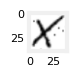

In [23]:
display_num(X[4900])

In [77]:
y=[]
for j in range(10):
  for i in range(500):
    y.append(j)
y=np.array(y)
y.shape

(5000,)

In [78]:
y = y.reshape(-1,1)
y.shape

(5000, 1)

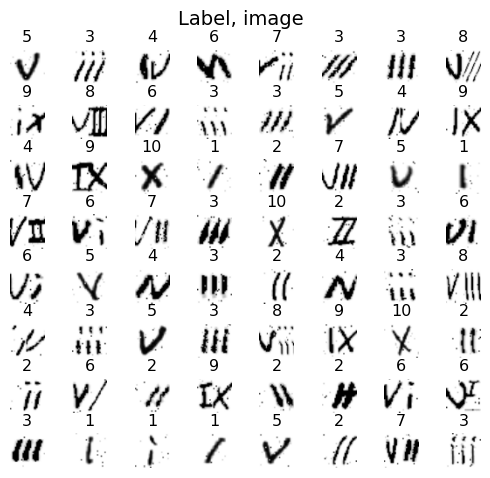

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((40,40)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0]+1)
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [32]:
np.save('X_roman.npy', X)

In [33]:
files.download('X_roman.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
np.save('y_roman.npy', y)
files.download('y_roman.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
def load_images_to_arra(folder_path, target_size=(40, 40)):
    image_list = []

    # Get all image files from the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    for img_file in image_files[:95]:
        img_path = os.path.join(folder_path, img_file)

        # Load image in RGB
        img = cv2.imread(img_path)

        if img is not None:
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize to target size (40x40)
            resized_img = cv2.resize(gray_img, target_size)

            # Convert to desired array format
            image_array = image_to_array(resized_img)

            # Append to list
            image_list.append(image_array.flatten())

    # Convert to numpy array with shape (500, 1600)
    image_array = np.array(image_list)

    print("Shape of the final array:", image_array.shape)
    return image_array


In [38]:
folder_path = "/content/rom/test/i"
image_ar_1 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/ii"
image_ar_2 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/iii"
image_ar_3 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/iv"
image_ar_4 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/v"
image_ar_5 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/vi"
image_ar_6 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/vii"
image_ar_7 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/viii"
image_ar_8 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/ix"
image_ar_9 = load_images_to_arra(folder_path)

folder_path = "/content/rom/test/x"
image_ar_10 = load_images_to_arra(folder_path)

X_test = np.vstack((image_ar_1,
               image_ar_2,
               image_ar_3,
               image_ar_4,
               image_ar_5,
               image_ar_6,
               image_ar_7,
               image_ar_8,
               image_ar_9,
               image_ar_10))

X_test.shape

Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)
Shape of the final array: (95, 1600)


(950, 1600)

In [92]:
X_test = X_test/255

In [93]:
y_test=[]
for j in range(10):
  for i in range(95):
    y_test.append(j)
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test.shape

(950, 1)

In [82]:
X1 = X/255

In [43]:
np.save('X_test_roman.npy', X_test)
files.download('X_test_roman.npy')
np.save('y_test_roman.npy', y_test)
files.download('y_test_roman.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
print("X1 NaNs:", np.isnan(X1).any(), " | Infs:", np.isinf(X1).any())
print("y NaNs:", np.isnan(y).any(), " | Infs:", np.isinf(y).any())

X1 NaNs: False  | Infs: False
y NaNs: False  | Infs: False


In [83]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(1600,)),
        Dense(25, activation='relu', name = "L1"),
        Dense(15, activation='relu',  name = "L2"),
        Dense(10, activation='linear', name = "L3"),
    ], name = "my_model"
)

In [84]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          40,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,575 (316.99 KB)

 Trainable params: 40,575 (316.99 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
[layer1, layer2, layer3] = model.layers

In [86]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (1600, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [87]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X1,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.2700
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8244
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3841
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1662
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9867
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8660
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7944
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7481
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7127
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6807
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6532
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6276
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6060
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5866
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

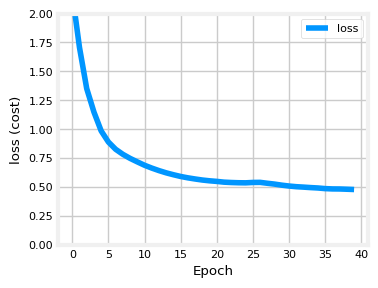

In [88]:
plot_loss_tf(history)

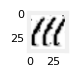

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
 predicting a Two: [[ 2.41 -2.56  7.51  3.86  1.08  1.45 -5.97 -9.61 -0.55  0.34]]
 Largest Prediction index: 2
 Largest Prediction : 3


 The probability vector: [[5.83e-03 4.05e-05 9.64e-01 2.50e-02 1.54e-03 2.24e-03 1.35e-06 3.52e-08
  3.03e-04 7.42e-04]]
Total of predictions: 1.000


In [90]:
image = X1[1015]
display_num(image)

prediction = model.predict(image_of_two.reshape(1,1600))  # prediction

print(f" predicting a Two: {prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f" Largest Prediction : {np.argmax(prediction)+1}")

prediction_p = tf.nn.softmax(prediction)
print('\n')
print(f" The probability vector: {prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

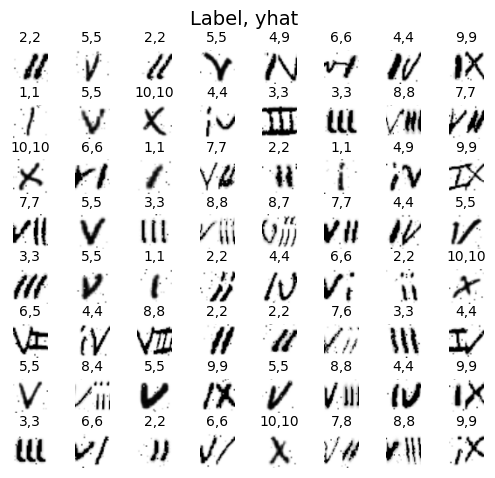

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X1.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X1[random_index].reshape((40,40)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X1[random_index].reshape(1,1600))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]+1},{yhat+1}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

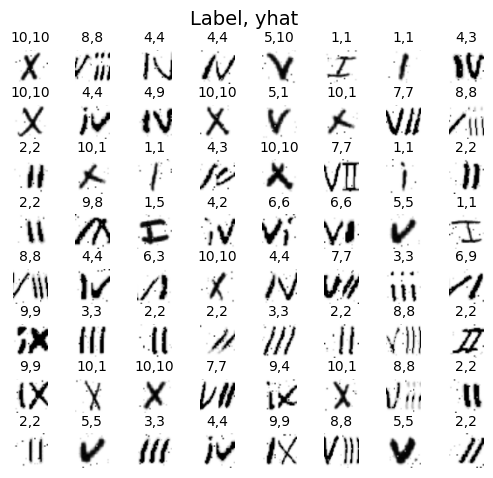

In [94]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((40,40)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,1600))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y_test[random_index,0]+1},{yhat+1}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [97]:
def display_error(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((40,40)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,1600))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]+1},{yhat+1}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
732 errors out of 5000 images in train set Train Set Accuracy =0.8536
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

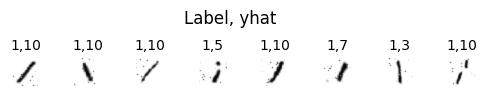

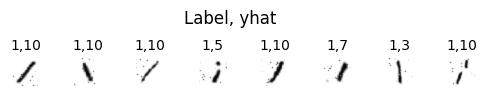

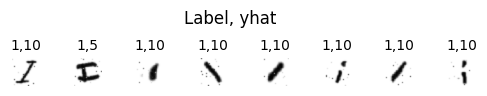

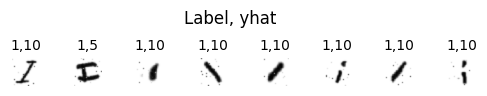

In [98]:
print( f"{display_error(model,X1,y)} errors out of {len(X1)} images in train set", f'Train Set Accuracy ={1-display_error(model,X1,y)/len(X1)}' )
print( f"{display_error(model,X_test,y_test)} errors out of {len(X_test)} images in test set",f'Test Set Accuracy ={1-display_error(model,X_test,y_test)/len(X_test)}')

# **Accuracy of the Model = 81.58%**